In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [122]:
data = pd.read_csv('titanic.csv')

In [123]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [124]:
data.shape

(891, 12)

In [125]:
data.size

10692

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


@now i gon drop the columns that are not relatable no usable so iam gona drop passengr id ,name,ticket,enbarked,sibsp,parch

In [127]:
data = data.drop(columns=["PassengerId","Name","SibSp","Parch","Cabin","Ticket","Embarked"])

In [128]:
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [129]:
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [130]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

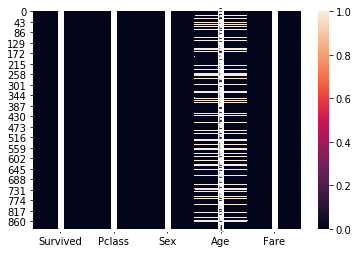

In [131]:
sns.heatmap(data.isnull(),annot=True)

In [132]:
data["Age"].fillna(data["Age"].mean(), inplace = True)

In [133]:
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [134]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

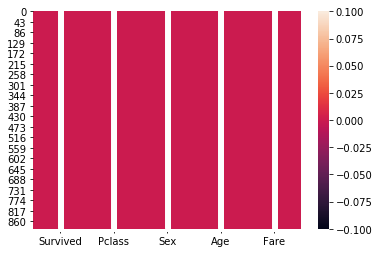

In [135]:
sns.heatmap(data.isnull(),annot=True)

In [136]:
sex = pd.get_dummies(data["Sex"], drop_first=True) 

In [137]:
data = pd.concat([data, sex], axis = 1)

In [138]:
data.drop(["Sex"], axis = 1, inplace = True)
data

,Survived,Pclass,Age,Fare,male
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


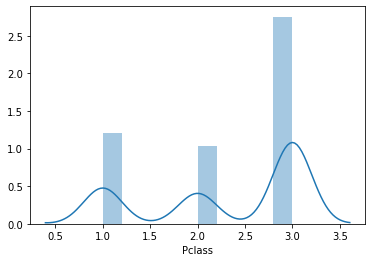

In [139]:
sns.distplot(data["Pclass"], kde=True)

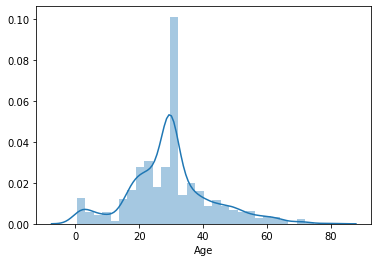

In [140]:
sns.distplot(data["Age"], kde=True)

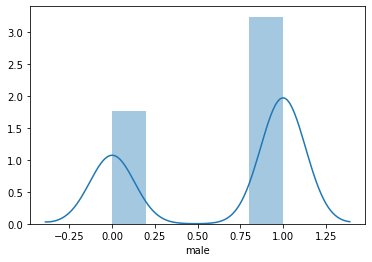

In [141]:
sns.distplot(data["male"], kde=True)

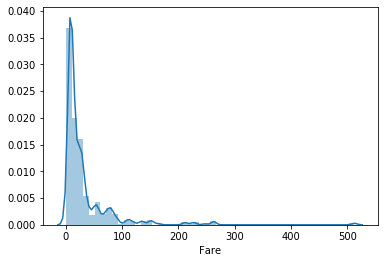

In [142]:
sns.distplot(data["Fare"], kde=True)

In [143]:
data["Fare"].skew()

4.787316519674893

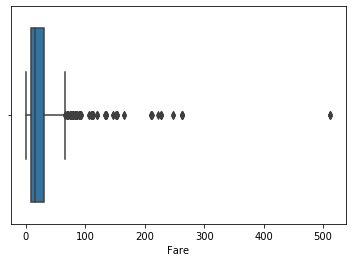

In [144]:
sns.boxplot(data["Fare"])

In [145]:
from scipy.stats import zscore
zscr = np.abs(zscore(data))

thershold = 3
print(np.where(zscr>3))

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851]), array([3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2]))


In [146]:
print("shape before the outliers", data.shape)

dsnew = data[(zscr<3).all(axis = 1)]

print("shape after removing outliers is", dsnew.shape)

shape before the outliers (891, 5)
shape after removing outliers is (864, 5)


In [147]:
data = dsnew

In [148]:
data

,Survived,Pclass,Age,Fare,male
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [149]:
for i in data.columns:
    if data[i].skew() > 0.5:
        data[i] = np.cbrt(data[i])
    if data[i].skew() < -0.5:
        data[i] = np.cbrt(data[i])
        
data.skew()
    

Survived    0.502011
Pclass     -0.866148
Age         0.239002
Fare        0.619588
male       -0.632203
dtype: float64

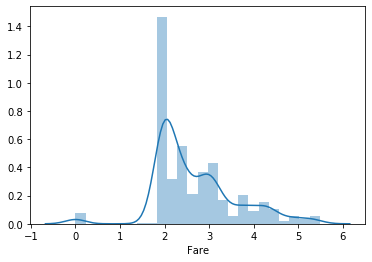

In [150]:
sns.distplot(data["Fare"], kde=True)

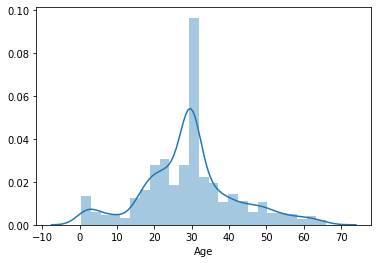

In [151]:
sns.distplot(data["Age"], kde=True)

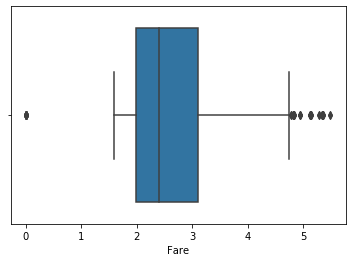

In [152]:
sns.boxplot(data["Fare"])

In [153]:
x = data.drop(["Survived"], axis = 1)
y = data["Survived"]

In [154]:
x, x.shape

(       Pclass        Age      Fare  male
 0    1.442250  22.000000  1.935438   1.0
 1    1.000000  38.000000  4.146318   0.0
 2    1.442250  26.000000  1.993730   0.0
 3    1.000000  35.000000  3.758647   0.0
 4    1.442250  35.000000  2.004158   1.0
 ..        ...        ...       ...   ...
 886  1.259921  27.000000  2.351335   1.0
 887  1.000000  19.000000  3.107233   0.0
 888  1.442250  29.699118  2.862294   0.0
 889  1.000000  26.000000  3.107233   1.0
 890  1.442250  32.000000  1.978946   1.0
 
 [864 rows x 4 columns],
 (864, 4))

In [155]:
y, y.shape

(0      0.0
 1      1.0
 2      1.0
 3      1.0
 4      0.0
       ... 
 886    0.0
 887    1.0
 888    0.0
 889    1.0
 890    0.0
 Name: Survived, Length: 864, dtype: float64,
 (864,))

In [156]:
from sklearn.preprocessing import StandardScaler
stdn = StandardScaler()
feature = ["Pclass","Age","Fare","male"]
x[feature] = stdn.fit_transform(x[feature])

In [157]:
x

,Pclass,Age,Fare,male
0,0.768109,-0.586622,-0.809015,0.733053
1,-1.713309,0.695098,1.596185,-1.364158
2,0.768109,-0.266192,-0.745599,-1.364158
3,-1.713309,0.454776,1.174441,-1.364158
4,0.768109,0.454776,-0.734255,0.733053
...,...,...,...,...
886,-0.254918,-0.186085,-0.356564,0.733053
887,-1.713309,-0.826945,0.465772,-1.364158
888,0.768109,0.030135,0.199305,-1.364158
889,-1.713309,-0.266192,0.465772,0.733053


In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold


In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x.shape, x_train.shape,x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(864, 4) (578, 4) (286, 4)
(864,) (578,) (286,)


In [160]:
model_params = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini', 'entropy']
            
        }
    },
    
    'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
            
        }
    },
    'SVC':{
        'model':SVC(),
        'param':{
            'kernel': ['rbf','linear','sigmoid'],
            'C' : [0.1, 1, 10, 100]
            
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [0,20,40,60,80,100],
            'criterion': ['gini', 'entropy']
            
        }
    },
    'AdaBoostClassifier':{
        'model':AdaBoostClassifier(),
        'param':{
            'n_estimators': [0,20,40,60,80,100]
            
            
        }
    },
    
    
}

In [161]:
scores = []

for model_name, mp in model_params.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'],return_train_score=False)
    model_selection.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [162]:
df_best = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

In [163]:
df_best

,model,best_score,best_params
0,DecisionTreeClassifier,0.730195,{'criterion': 'entropy'}
1,KNeighborsClassifier,0.826957,{'n_neighbors': 5}
2,SVC,0.816582,"{'C': 1, 'kernel': 'rbf'}"
3,RandomForestClassifier,0.799340,"{'criterion': 'entropy', 'n_estimators': 60}"
4,AdaBoostClassifier,0.801079,{'n_estimators': 40}


we got nearestneighbor wmode with good prediction so we will apply that model


In [164]:
knr = KNeighborsClassifier()
knr.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [165]:
prediction = knr.predict(x_test)
print(prediction)
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

[1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
0.8251748251748252
[[163  18]
 [ 32  73]]
              precision    recall  f1-score   support

         0.0       0.84      0.9

In [166]:
import joblib

In [167]:
joblib.dump(knr, "KNtitanicmodel")

['KNtitanicmodel']

In [168]:
obje = joblib.load("KNtitanicmodel")

In [169]:
obje.predict(x_train)

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0.

now lets try it on test data

In [182]:
df2 = pd.read_csv("titanic_test.csv")

In [183]:
df2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [184]:
df3=df2.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1 )

In [185]:
df3

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [186]:
df3.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [187]:
df3['Age'].fillna(df3['Age'].mean(),inplace=True)
df3['Fare'].fillna(df3['Fare'].mean(),inplace=True)

In [188]:
l_sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3= pd.concat([df3,l_sex_dummies],axis=1)
df3.drop(['Sex'], axis=1, inplace=True )

In [189]:
df3

,Pclass,Age,Fare,male
0,3,34.50000,7.8292,1
1,3,47.00000,7.0000,0
2,2,62.00000,9.6875,1
3,3,27.00000,8.6625,1
4,3,22.00000,12.2875,0
...,...,...,...,...
413,3,30.27259,8.0500,1
414,1,39.00000,108.9000,0
415,3,38.50000,7.2500,1
416,3,30.27259,8.0500,1


In [190]:
feature = ["Pclass","Age","Fare","male"]
df3[feature] = stdn.fit_transform(df3[feature])

In [191]:
df3

,Pclass,Age,Fare,male
0,0.873482,0.334993,-0.498407,0.755929
1,0.873482,1.325530,-0.513274,-1.322876
2,-0.315819,2.514175,-0.465088,0.755929
3,0.873482,-0.259330,-0.483466,0.755929
4,0.873482,-0.655545,-0.418471,-1.322876
...,...,...,...,...
413,0.873482,0.000000,-0.494448,0.755929
414,-1.505120,0.691586,1.313753,-1.322876
415,0.873482,0.651965,-0.508792,0.755929
416,0.873482,0.000000,-0.494448,0.755929


In [192]:
y_predict = obje.predict(df3)

In [193]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [198]:
submission = pd.DataFrame({
        "PassengerId": df2['PassengerId'],
        "Survived": y_predict
    })

In [201]:
submission.to_csv('titanic_submission_v02.csv', index=False)